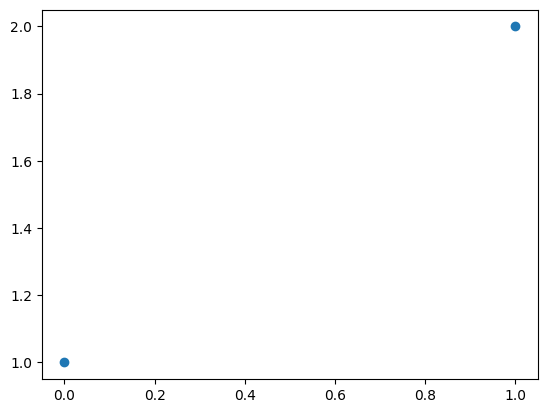

In [30]:
import sys
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seis-library/')
import kaggle_support as kgs
import importlib
import numpy as np
import matplotlib.pyplot as plt
import glob
import copy
import os
import seis_forward
import seis_forward2
import seis_test
plt.scatter([0,1],[1,2])
#fls.download_kaggle_dataset('jeroencottaar/byu-many-models-2/', fls.result_dir + '/many_full_res/')

In [ ]:
%%time
importlib.reload(kgs)
importlib.reload(seis_test)
importlib.reload(seis_forward2)
seis_test.run_all_tests(test_reference_mode=True)


In [24]:
import cupy as cp
importlib.reload(seis_forward2)

d = kgs.load_all_train_data()[0]
d.load_to_memory()    
vec = d.velocity.to_vector()

kgs.profiling=True
result, result_diff, result_adjoint = seis_forward2.vel_to_seis(vec)

Timer unit: 1e-07 s

Total time: 0.408616 s
File: f:\seismic/code/core\seis_forward2.py
Function: vel_to_seis at line 12

Line #      Hits         Time  Per Hit   % Time  Line Contents
    12                                           @kgs.profile_each_line
    13                                           def vel_to_seis(vec, vec_diff=None, vec_adjoint=None, adjoint_on_residual=False):
    14                                               # Outputs:
    15                                               # result: the seismogram associated with velocity field vec
    16                                               # result_diff: J@vec_diff, where J is the Jacobian of the operation above
    17                                               # result_adjoint: J^T@vec_adjoint, or J^T@(result-vec_adjoint) if adjoint_on_residual=True
    18         1         12.0     12.0      0.0      assert vec.shape == (4901,1)
    19         1          3.0      3.0      0.0      assert vec_adjoint is None or

In [4]:
vec[0]+vec_diff[0], vec[0]

NameError: name 'vec_diff' is not defined

In [ ]:
np.arange(0,5)

In [ ]:
np.arange(4,-1,-1)